In [ ]:
# !pip install tensorflow==2.15.0

In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt

### Preparing Dataset

In [36]:
dataset_path = "7-7-faces"
width = height = 224

image_data_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,

    #data augmentation
    horizontal_flip=True,
    brightness_range=(0.8, 1.2)
)

train_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='training',
    shuffle=True,
    batch_size=32
)

validation_data = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width, height),
    subset='validation',
    shuffle=False,
    batch_size=32
)

Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


In [13]:
next(train_data)[0].shape

(32, 224, 224, 3)

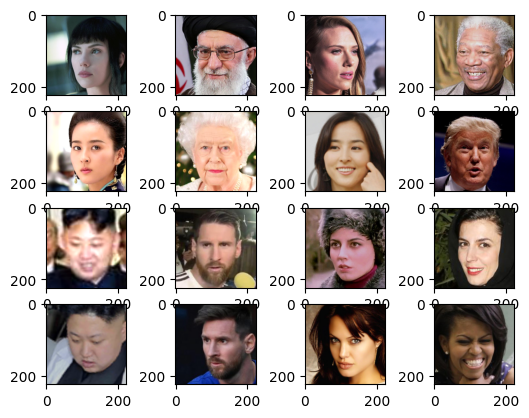

In [14]:
train_images = next(train_data)[0]

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_images[i])

### Create Model

In [39]:
base_model = tf.keras.applications.MobileNetV2()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.h5: 403 -- Forbidden

In [ ]:
base_model.summary()

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",     #Transfer Learning
    input_shape=(width, height, 3),
    pooling="avg"
)

In [ ]:
base_model.summary()

In [ ]:
for layer in base_model.layers[0:-4]:
    layer.trainable=False

In [ ]:
base_model.summary()

In [ ]:
model = Sequential([
    base_model,
    layers.Dense(14, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense (Dense)               (None, 14)                17934     
                                                                 
Total params: 2275918 (8.68 MB)
Trainable params: 430094 (1.64 MB)
Non-trainable params: 1845824 (7.04 MB)
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),      #0.0001
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=32)

Epoch 1/32
39/39 [==============================] - 457s 12s/step - loss: 1.6887 - accuracy: 0.5126 - val_loss: 1.4220 - val_accuracy: 0.5649
Epoch 2/32
39/39 [==============================] - 71s 2s/step - loss: 0.8019 - accuracy: 0.8280 - val_loss: 1.0881 - val_accuracy: 0.6489
Epoch 3/32
39/39 [==============================] - 67s 2s/step - loss: 0.5089 - accuracy: 0.9022 - val_loss: 0.9349 - val_accuracy: 0.7023
Epoch 4/32
39/39 [==============================] - 69s 2s/step - loss: 0.3653 - accuracy: 0.9364 - val_loss: 0.8102 - val_accuracy: 0.7634
Epoch 5/32
39/39 [==============================] - 65s 2s/step - loss: 0.2722 - accuracy: 0.9511 - val_loss: 0.7739 - val_accuracy: 0.7557
Epoch 6/32
39/39 [==============================] - 72s 2s/step - loss: 0.2130 - accuracy: 0.9707 - val_loss: 0.7116 - val_accuracy: 0.7557
Epoch 7/32
39/39 [==============================] - 70s 2s/step - loss: 0.1718 - accuracy: 0.9739 - val_loss: 0.6994 - val_accuracy: 0.7634
Epoch 8/32
39/39 [

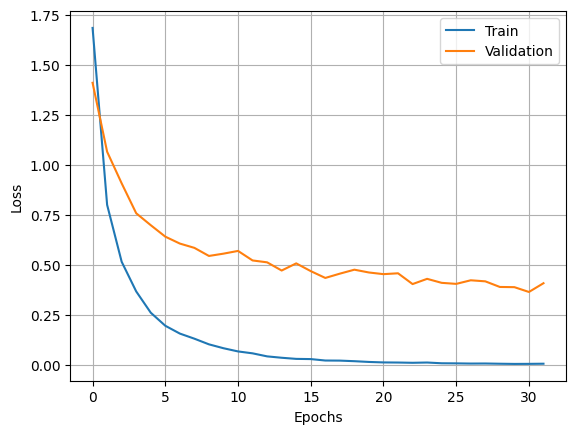

In [ ]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

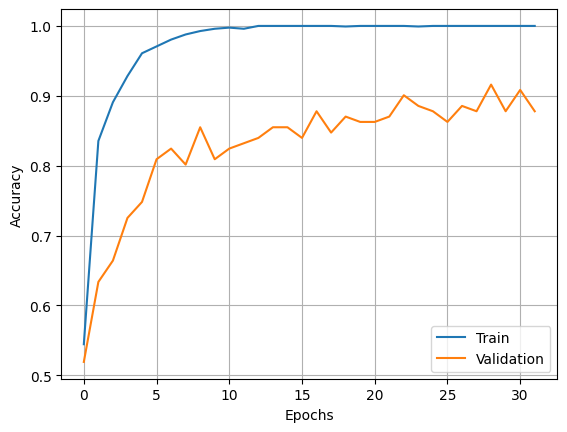

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()